In [1]:
import pandas as pd

factories = pd.read_csv("../rawdata/tbl_factory.csv", index_col=0)
factories

,FCName,FCDemand,FCRegion
FCID,,,
FC00001,서울공장,28,북부
FC00002,수원공장,29,북부
FC00003,인천공장,31,북부
FC00004,대전공장,25,북부
FC00005,대구공장,21,남부
FC00006,광주공장,30,남부
FC00007,부산공장,25,남부
FC00008,울산공장,16,남부


In [2]:
# 창고 데이터 불러오기
warehouses = pd.read_csv("../rawdata/tbl_warehouse.csv", index_col=0)
warehouses

,WHName,WHSupply,WHRegion
WHID,,,
WH00001,판교창고,35,북부
WH00002,용인창고,41,북부
WH00003,수원창고,42,북부
WH00004,대전창고,60,남부
WH00005,대구창고,72,남부
WH00006,광주창고,65,남부


In [4]:
# 비용 테이블
cost = pd.read_csv("../rawdata/rel_cost.csv", index_col=0)
cost.head()

,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8


In [6]:
# 운송 실적 테이블
trans = pd.read_csv("../rawdata/tbl_transaction.csv", index_col=0)
trans

,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30
...,...,...,...,...
3995,2019-12-31 11:27:51,FC00007,WH00006,29
3996,2019-12-31 17:10:21,FC00002,WH00003,35
3997,2019-12-31 19:35:07,FC00003,WH00001,36


In [7]:
join_data = pd.merge(trans, cost, left_on=["ToFC", "FromWH"], right_on=["FCID", "WHID"], how="left")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8


In [8]:
join_data = pd.merge(join_data, factories, left_on="ToFC", right_on="FCID", how="left")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,대전공장,25,북부
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,부산공장,25,남부
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,광주공장,30,남부
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,수원공장,29,북부
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,서울공장,28,북부


In [9]:
join_data = pd.merge(join_data, warehouses, left_on="FromWH", right_on="WHID", how="left")
join_data = join_data[["TransactionDate", "Quantity", "Cost", "ToFC", "FCName", "FCDemand", "FromWH", "WHName", "WHSupply", "WHRegion"]]
join_data.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
1,2019-01-01 06:12:42,19,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
2,2019-01-01 06:32:32,31,0.9,FC00006,광주공장,30,WH00004,대전창고,60,남부
3,2019-01-01 07:17:06,18,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부
4,2019-01-01 07:52:18,30,0.8,FC00001,서울공장,28,WH00002,용인창고,41,북부


In [10]:
north = join_data.loc[join_data["WHRegion"]=="북부"]
north.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
3,2019-01-01 07:17:06,18,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부
4,2019-01-01 07:52:18,30,0.8,FC00001,서울공장,28,WH00002,용인창고,41,북부
7,2019-01-01 09:09:30,12,1.5,FC00001,서울공장,28,WH00003,수원창고,42,북부
8,2019-01-01 10:52:55,27,1.5,FC00003,인천공장,31,WH00003,수원창고,42,북부


In [11]:
south = join_data.loc[join_data["WHRegion"]=="남부"]
south.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,19,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
2,2019-01-01 06:32:32,31,0.9,FC00006,광주공장,30,WH00004,대전창고,60,남부
5,2019-01-01 08:56:09,31,0.3,FC00005,대구공장,21,WH00005,대구창고,72,남부
6,2019-01-01 09:00:15,33,0.7,FC00006,광주공장,30,WH00006,광주창고,65,남부
9,2019-01-01 14:12:51,21,0.7,FC00006,광주공장,30,WH00006,광주창고,65,남부


In [12]:
print("북부지사 총비용: " + str(north["Cost"].sum()) + "만원")
print("남부지사 총비용: " + str(south["Cost"].sum()) + "만원")

북부지사 총비용: 2189.3만원
남부지사 총비용: 2062.0만원


In [13]:
print("북부지사의 총부품 운송개수: " + str(north["Quantity"].sum()) + "개")
print("남부지사의 총부품 운송개수: " + str(south["Quantity"].sum()) + "개")

북부지사의 총부품 운송개수: 49146개
남부지사의 총부품 운송개수: 50214개


In [14]:
tmp = (north["Cost"].sum() / north["Quantity"].sum()) * 10000
print("북부지사의 부품 1개당 운송 비용: " + str(int(tmp)) + "원")
tmp = (south["Cost"].sum() / south["Quantity"].sum()) * 10000
print("남부지사의 부품 1개당 운송 비용: " + str(int(tmp)) + "원")

북부지사의 부품 1개당 운송 비용: 445원
남부지사의 부품 1개당 운송 비용: 410원


In [16]:
cost_chk = pd.merge(cost, factories, on="FCID", how="left")
print("북부지사의 평균 운송 비용 : " + str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="북부"].mean()) + "원")
print("남부지사의 평균 운송 비용 : " + str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="남부"].mean()) + "원")

북부지사의 평균 운송 비용 : 1.075원
남부지사의 평균 운송 비용 : 1.05원


In [17]:
cost_chk.loc[cost_chk["FCRegion"]=="북부"]

,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,FC00001,WH00001,0.4,서울공장,28,북부
1,FC00001,WH00002,0.8,서울공장,28,북부
2,FC00001,WH00003,1.5,서울공장,28,북부
3,FC00002,WH00001,0.9,수원공장,29,북부
4,FC00002,WH00002,0.8,수원공장,29,북부
5,FC00002,WH00003,1.6,수원공장,29,북부
6,FC00003,WH00001,1.2,인천공장,31,북부
7,FC00003,WH00002,1.3,인천공장,31,북부
8,FC00003,WH00003,1.5,인천공장,31,북부
9,FC00004,WH00001,0.8,대전공장,25,북부


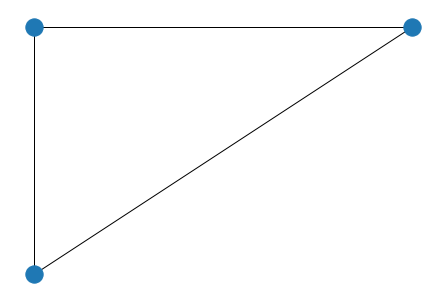

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

# 그래프 객체 생성
G=nx.Graph()

# 노드 설정
G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")

# 엣지 설정
G.add_edge("nodeA","nodeB")
G.add_edge("nodeA","nodeC")
G.add_edge("nodeB","nodeC")

# 좌표 설정
pos={}
pos["nodeA"]=(0,0)
pos["nodeB"]=(1,1)
pos["nodeC"]=(0,1)

# 그리기
nx.draw(G,pos)

# 표시
plt.show()

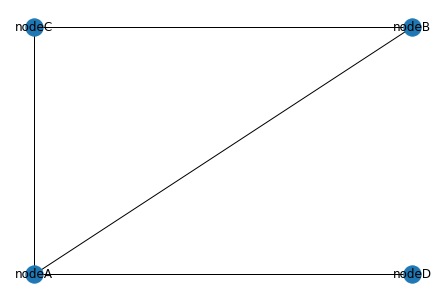

In [30]:
G.add_node("nodeD")
G.add_edge("nodeA","nodeD")
pos["nodeD"]=(1,0)
nx.draw(G,pos, with_labels=True)

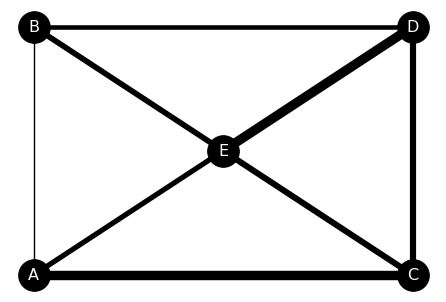

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx

# 데이터 불러오기
df_w = pd.read_csv("../rawdata/network_weight.csv")
df_p = pd.read_csv("../rawdata/network_pos.csv")

# 엣지 가중치 리스트화
size = 10
edge_weights = []
for i in range(len(df_w)):
    for j in range(len(df_w.columns)):
        edge_weights.append(df_w.iloc[i][j]*size)
    
# 그래프 객체 생성
G = nx.Graph()

# 노드 설정
for i in range(len(df_w.columns)):
    for j in range(len(df_w.columns)):
        G.add_edge(df_w.columns[i], df_w.columns[j])
        
# 좌표 설정
pos={}
for i in range(len(df_w.columns)):
    node = df_w.columns[i]
    pos[node] = (df_p[node][0], df_p[node][1])
    
# 그리기
nx.draw(G, pos, with_labels=True, font_size=16, node_size = 1000, node_color='k', font_color="w", width=edge_weights)

# 표시
plt.show()

In [33]:
df_p

,A,B,C,D,E
0,0,0,2,2,1
1,0,2,0,2,1


In [34]:
df_w

,A,B,C,D,E
0,0.639921,0.143353,0.944669,0.521848,0.000000
1,0.264556,0.000000,0.456150,0.568434,0.000000
2,0.617635,0.612096,0.616934,0.943748,0.000000
3,0.000000,0.000000,0.697631,0.060225,0.666767
4,0.670638,0.210383,0.000000,0.315428,0.000000


In [37]:
# 운송 경로 정보 불러오기
import pandas as pd
df_tr = pd.read_csv("../rawdata/trans_route.csv", index_col="공장")
df_pos = pd.read_csv("../rawdata/trans_route_pos.csv")
df_tr.head()

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


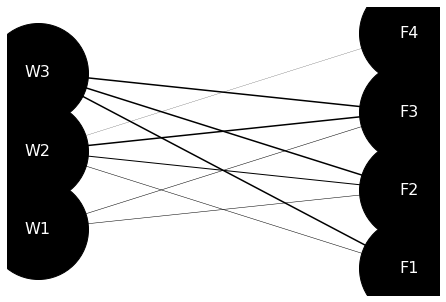

In [38]:
# 객체 생성
G = nx.Graph()

# 노드 설정
for i in range(len(df_pos.columns)):
    G.add_node(df_pos.columns[i])

# 엣지 설정 및 가중치 리스트화
num_pre = 0
edge_weights = []
size = 0.1
for i in range(len(df_pos.columns)):
    for j in range(len(df_pos.columns)):
        if not (i==j):
            # 엣지 추가
            G.add_edge(df_pos.columns[i], df_pos.columns[j])
            # 가중치 추가
            if num_pre < len(G.edges):
                num_pre = len(G.edges)
                weight = 0
                if (df_pos.columns[i] in df_tr.columns) and (df_pos.columns[j] in df_tr.index):
                    if df_tr[df_pos.columns[i]][df_pos.columns[j]]:
                        weight = df_tr[df_pos.columns[i]][df_pos.columns[j]] * size
                elif (df_pos.columns[j] in df_tr.columns) and (df_pos.columns[i] in df_tr.index):
                    if df_tr[df_pos.columns[j]][df_pos.columns[i]]:
                        weight = df_tr[df_pos.columns[j]][df_pos.columns[i]] * size
                    edge_weights.append(weight)

                    
# 좌표 설정
pos = {}
for i in range(len(df_pos.columns)):
    node = df_pos.columns[i]
    pos[node] = (df_pos[node][0], df_pos[node][1])

# 그리기
nx.draw(G, pos, with_labels=True, font_size=16, node_size=10000, node_color="k", font_color="w", width=edge_weights)

# 표시
plt.show()

In [39]:
# 운송 비용 함수를 작성
import pandas as pd

df_tr = pd.read_csv("../rawdata/trans_route.csv", index_col="공장")
df_tc = pd.read_csv("../rawdata/trans_cost.csv", index_col="공장")

# 운송 비용함수
def trans_cost(df_tr, df_tc):
    cost = 0
    for i in range(len(df_tc.index)):
        for j in range(len(df_tr.columns)):
            cost += df_tr.iloc[i][j] * df_tc.iloc[i][j]
    return cost

print("총 운송 비용 :"+str(trans_cost(df_tr, df_tc)))

총 운송 비용 :1493


In [40]:
# 제약 조건 만들기
df_tr = pd.read_csv("../rawdata/trans_route.csv", index_col="공장")
df_demand = pd.read_csv("../rawdata/demand.csv")
df_supply = pd.read_csv("../rawdata/supply.csv")

# 수요측 제약 조건
for i in range(len(df_demand.columns)):
    temp_sum = sum(df_tr[df_demand.columns[i]])
    print(str(df_demand.columns[i]) + "으로 운송량:" + str(temp_sum) + " (수요량:"+str(df_demand.iloc[0][i]) + ")")
    if temp_sum >= df_demand.iloc[0][i]:
        print("수요량을 만족 시키고 있음")
    else:
        print("수요량을 만족시키지 못하고 있음. 운송경로 재계산 필요")

F1으로 운송량:30 (수요량:28)
수요량을 만족 시키고 있음
F2으로 운송량:30 (수요량:29)
수요량을 만족 시키고 있음
F3으로 운송량:32 (수요량:31)
수요량을 만족 시키고 있음
F4으로 운송량:25 (수요량:25)
수요량을 만족 시키고 있음


In [41]:
# 공급측 제약 조건
for i in range(len(df_supply.columns)):
    temp_sum = sum(df_tr.loc[df_supply.columns[i]])
    print(str(df_supply.columns[i]) + " 부터의 운송량:" + str(temp_sum) + " (공급한계:" + str(df_supply.iloc[0][i]) + ")")
    
    if temp_sum <= df_supply.iloc[0][i]:
        print("공급한계 범위내")
    else:
        print("공급한계 초과. 운송경로 재계산 필요")

W1 부터의 운송량:35 (공급한계:35)
공급한계 범위내
W2 부터의 운송량:40 (공급한계:41)
공급한계 범위내
W3 부터의 운송량:42 (공급한계:42)
공급한계 범위내


In [42]:
# 데이터 불러오기
df_tr_new = pd.read_csv("../rawdata/trans_route_new.csv", index_col="공장")
print(df_tr_new)

    F1  F2  F3  F4
공장                
W1  15  15   0   0
W2   5   0  30  10
W3  10  15   2  15


In [43]:
# 총 운송 비용 재계산
print("총 운송 비용(변경 후) : "+ str(trans_cost(df_tr_new, df_tc)))

총 운송 비용(변경 후) : 1428


In [44]:
# 제약 조건 계산함수
# 수요측
def condition_demand(df_tr, df_demand):
    flag = np.zeros(len(df_demand.columns))
    for i in range(len(df_demand.columns)):
        temp_sum = sum(df_tr[df_demand.columns[i]])
        if (temp_sum>=df_demand.iloc[0][i]):
            flag[i] = 1
    return flag

In [45]:
# 공급측
def condition_supply(df_tr, df_supply):
    flag = np.zeros(len(df_supply.columns))
    for i in range(len(df_supply.columns)):
        temp_sum = sum(df_tr.loc[df_supply.columns[i]])
        if temp_sum <= df_supply.iloc[0][i]:
            flag[i] = 1
            
    return flag

print("수요조건 계산결과:" + str(condition_demand(df_tr_new, df_demand)))
print("공급조건 계산결과:" + str(condition_supply(df_tr_new, df_supply)))

수요조건 계산결과:[1. 1. 1. 1.]
공급조건 계산결과:[1. 0. 1.]
